In [5]:
import numpy as np
from scipy.io import loadmat
dataset1 = loadmat('dataset1-small.mat')
print(dataset1)
dataset1_processed = np.array(dataset1['f0'])
#sample rate in hz
sr = int(dataset1['samplerate'][0].replace(' Hz', ''))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov 15 10:39:00 2007', '__version__': '1.0', '__globals__': [], 'f0': array([[ 0.00465658],
       [ 0.00627838],
       [-0.00215498],
       ...,
       [ 0.00400786],
       [ 0.00173734],
       [ 0.0053053 ]]), 'dataset': array(['Simulated small tremor'], dtype='<U22'), 'samplerate': array(['500 Hz'], dtype='<U6'), 'info': array(['This is simulated data that has been adjusted for the structure in the South Wing lab'],
      dtype='<U85')}


In [6]:
print(len(dataset1_processed))

37500


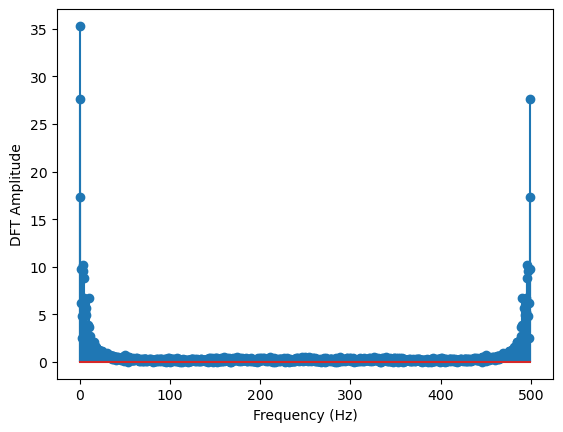

In [7]:
from Fourier import DiscreteFourierTransform

# the data set now is killing the kernel because it is too large 
dataset1_transform = DiscreteFourierTransform(dataset1_processed[0:1000], sr)
dataset1_transform.DFT()
dataset1_transform.DFTplot()

In [8]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_dft(x, fs):
    """
    Compute the Discrete Fourier Transform (DFT) of the input signal x and plot the magnitude and phase spectra.
    """
    N = len(x)
    X = np.fft.fft(x)  # Compute the DFT using numpy's fft function
    freq = np.fft.fftfreq(N, d=1/fs)  # Compute the frequency axis

    # Plot the magnitude spectrum
    plt.figure(figsize=(16, 8))
    plt.stem(freq, np.abs(X))
    #plt.grid(which='major', axis='both', linestyle='--', linewidth=0.5, color='gray')
    #plt.grid(which='minor', axis='both', linestyle=':', linewidth=0.5, color='black')
    plt.xticks(np.arange(-10, 10, 1))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.grid()


In [10]:
#windowing function
#hanning window - the most basic, will cut the effect of side signals
sampling_range=len(dataset1_processed)
dataset1_hanning=dataset1_processed*np.hanning(sampling_range)
dataset1_hanning_transform = DiscreteFourierTransform(dataset1_hanning[0:len(dataset1_processed)], sr)
dataset1_hanning_transform.DFT()
dataset1_hanning_transform.DFTplot()
#plot_dft(dataset1_hanning,sr)

MemoryError: Unable to allocate 21.0 GiB for an array with shape (37500, 37500) and data type complex128